In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans

In [2]:
crypto_db = pd.read_csv('crypto_data.csv')
crypto_db.shape

(1252, 7)

In [3]:
# How many of them are true and false
crypto_db['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [4]:
crypto_db_trade = crypto_db[crypto_db['IsTrading'] == True]
crypto_db_trade.shape

(1144, 7)

In [5]:
crypto_db_trade['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [6]:
crypto_db_trade = crypto_db_trade.drop(['IsTrading'], axis=1)

In [7]:
crypto_db_trade = crypto_db_trade.dropna()
crypto_db_trade.shape

(685, 6)

In [8]:
crypto_db_clean = crypto_db_trade[crypto_db_trade['TotalCoinSupply'] != '0'].drop(['Unnamed: 0', 'CoinName'], axis=1)

In [9]:
crypto_db_clean['TotalCoinSupply'] = crypto_db_clean['TotalCoinSupply'].astype('float')

In [10]:
crypto_db_clean.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [11]:
crypto_db_clean['Algorithm'].value_counts()

Scrypt                   211
X11                       92
SHA-256                   66
CryptoNight               22
Quark                     20
                        ... 
SkunkHash v2 Raptor        1
VeChainThor Authority      1
M7 POW                     1
POS 2.0                    1
TRC10                      1
Name: Algorithm, Length: 78, dtype: int64

In [12]:
crypto_db_clean['ProofType'].value_counts()

PoW                     300
PoW/PoS                 211
PoS                      95
DPoS                      8
PoC                       3
PoS/PoW                   1
LPoS                      1
DPoC                      1
Proof of Trust            1
POS / MN                  1
Pos                       1
DPOS                      1
Zero-Knowledge Proof      1
HPoW                      1
POBh                      1
PoA                       1
PoW + Hive                1
PoW and PoS               1
Proof of Authority        1
PoW/PoS                   1
TPoS                      1
PoW/PoW                   1
dPoW/PoW                  1
PoW/nPoS                  1
PoS/LPoS                  1
Name: ProofType, dtype: int64

In [13]:
crypto_db_clean = pd.get_dummies(crypto_db_clean)
crypto_db_clean.shape

(637, 105)

In [14]:
scaler = StandardScaler()
scaled_crypto_db = scaler.fit_transform(crypto_db_clean)

In [15]:
pca = PCA(n_components=.90)
pca_scaled_crypto_db = pca.fit_transform(scaled_crypto_db)
pca_scaled_crypto_db = pd.DataFrame(pca_scaled_crypto_db)
pca_scaled_crypto_db

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-0.160261,-1.182885,-0.550083,-4.155959e-07,-9.963688e-09,2.000870e-10,-5.019337e-11,-4.992794e-10,0.015750,-1.162458,...,5.906370e-13,6.759112e-13,-3.701833e-13,1.724383e-13,5.459520e-13,5.518474e-13,-7.770555e-13,-7.267755e-14,-2.666910e-13,-6.834427e-13
1,-0.145856,-1.180922,-0.550503,-4.155959e-07,-9.963689e-09,2.000870e-10,-5.019338e-11,-4.992794e-10,0.014381,-1.164725,...,5.910202e-13,6.759351e-13,-3.706445e-13,1.719705e-13,5.461398e-13,5.517736e-13,-7.770790e-13,-7.281629e-14,-2.661965e-13,-6.836705e-13
2,0.406774,-1.934732,-0.622302,-5.915520e-07,-1.418215e-08,2.848127e-10,-7.143711e-11,-7.106660e-10,-0.029898,-0.753670,...,3.321471e-14,1.006691e-13,-7.838474e-16,-1.020310e-14,-2.269997e-14,-5.109465e-14,8.644403e-15,1.472136e-14,6.259814e-15,5.183308e-14
3,-0.246677,1.406204,0.188435,2.214351e-07,5.308798e-09,-1.066153e-10,2.674134e-11,2.660253e-10,-0.011565,0.155303,...,2.593566e-15,8.876458e-15,-4.477932e-15,2.135494e-15,-3.724791e-15,-1.028394e-14,3.860336e-15,8.922671e-16,-1.327284e-15,1.856706e-15
4,-0.318125,1.058161,-0.011589,1.120829e-07,2.687143e-09,-5.397117e-11,1.353240e-11,1.346540e-10,0.007188,-0.363163,...,5.934660e-13,6.815177e-13,-3.676591e-13,1.693975e-13,5.450718e-13,5.493685e-13,-7.759541e-13,-7.174308e-14,-2.656713e-13,-6.834378e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,4.330349,0.301908,-0.119242,-1.156728e-07,-2.773183e-09,5.568193e-11,-1.395455e-11,-1.389018e-10,-1.044660,0.619719,...,6.578324e-18,7.616774e-15,-4.276170e-15,2.042807e-15,-4.889290e-15,-1.191261e-14,6.968489e-15,3.115521e-16,-2.265100e-15,2.018868e-15
633,-0.160057,-1.182857,-0.550089,-4.155959e-07,-9.963688e-09,2.000869e-10,-5.019339e-11,-4.992793e-10,0.015731,-1.162490,...,5.907056e-13,6.761454e-13,-3.701450e-13,1.723700e-13,5.463435e-13,5.517547e-13,-7.775905e-13,-7.306395e-14,-2.658276e-13,-6.839746e-13
634,-0.201116,2.218903,0.376254,4.316441e-07,1.034846e-08,-2.078258e-10,5.212701e-11,5.185625e-10,-0.010967,0.112984,...,7.094084e-15,-4.004890e-14,-2.349551e-14,2.834812e-14,-2.460995e-14,-3.088933e-14,1.994998e-14,-2.064033e-14,4.996167e-15,-3.147294e-15
635,-0.343673,1.923417,0.336221,3.712491e-07,8.900514e-09,-1.787455e-10,4.483291e-11,4.460051e-10,0.008728,0.255941,...,5.940871e-13,6.795021e-13,-3.602912e-13,1.765168e-13,5.436274e-13,5.392764e-13,-7.733788e-13,-6.998683e-14,-2.585473e-13,-6.876770e-13


In [16]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_pca_crpyto_df = tsne.fit_transform(pca_scaled_crypto_db)
tsne_pca_crpyto_df = pd.DataFrame(tsne_pca_crpyto_df)
tsne_pca_crpyto_df

,0,1
0,-13.386483,-8.355470
1,-15.248445,-14.923240
2,-27.722481,-7.995842
3,17.812099,25.447477
4,10.901923,-11.228732
...,...,...
632,-1.069011,3.317613
633,-9.902014,-12.776445
634,18.722347,-23.611738
635,23.808405,1.949064


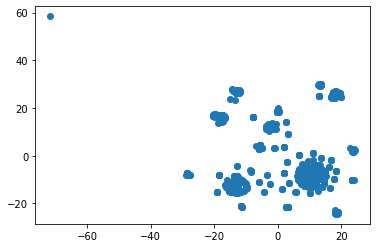

In [17]:
plt.scatter(tsne_pca_crpyto_df[0], tsne_pca_crpyto_df[1])


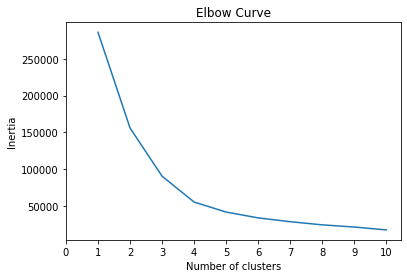

In [18]:
inertia = []
k =list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_pca_crpyto_df)
    inertia.append(km.inertia_)

elbow_data = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()